## Linear Regression

## Warm-up Task(s)
* Create LinearRegression.ipynb
    * Create an xy dataset with 100 points that roughly resembles y = 2x plus some noise
    * Let's seed our random number generator so we all have the same x, y dataset: `np.random.seed(0)`
    * Plot the xy data as a scatter plot

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)

x = list(range(100))
y = []

for val in x:
    y.append(val * 2 + np.random.normal(0,25)) # mean is 0, std is 25

print(y)

[44.1013086491916, 12.003930209180583, 28.46844960264348, 62.022329980036446, 54.688949753749185, -14.431946996910277, 35.752210438139734, 10.216069792557553, 13.419528705161053, 28.26496254845931, 23.60108927902195, 58.35683767407438, 43.02594312867484, 29.04187541232071, 39.096580818635644, 38.34185818435667, 69.35197682894015, 28.871043405854977, 43.826692541272536, 16.64760651745688, -23.82474539585197, 58.340464886009016, 65.61090497148764, 27.44587448983895, 104.7438655996902, 13.640858135030882, 53.143962932536155, 49.320403749354156, 94.31948035896144, 94.73396924750713, 63.873685642422906, 71.45406299005434, 41.80535630924718, 16.480088294401824, 59.30219626684618, 73.9087242275995, 102.75726701819302, 104.05949621961028, 66.3168295648012, 70.44243123561661, 53.786175873322684, 46.49955157052562, 41.343245234374685, 134.76938488079475, 75.25869545620867, 79.04814245972034, 60.680115998751845, 113.43725889579775, 55.65255381105121, 92.68149299465078, 77.6133359701581, 111.67256

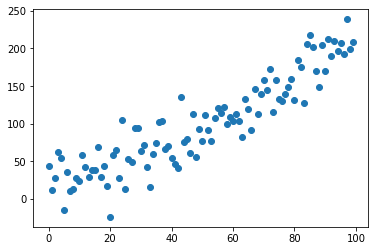

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

## Intro to Regression
* Recall with supervised ML, whent he attribute we want to predict is categorical, it is a classification task
    * When the attribute is continuous (floating point data) it is a regression task
* There are lots of regression algorithms (in scikitlearn, they are called regressors)
    * Linear regression
    * kNN regressor
    * Decision tree regressor
    * Support vector regressor
    * others ...
* Goal: fit a line to the xy data
    * Recall y = mx+b
    * WHen there is 1 independent variable (x), it is called simple linear regression
    * There is also multiple linear regression

In [3]:
import scipy.stats as stats

m,b,r,p_val,std_err = stats.linregress(x,y)
print("m:",m,"b:",b,"r:",r)

m: 1.9249174584304443 b: 5.2117861960551295 r: 0.9113097511932392


In [4]:
# make a prediction for unseen x
test_instance = 100
y_predicted = m * test_instance+b
print("prediction:",y_predicted, "residual (error):",2*test_instance - y_predicted)

prediction: 197.70353203909954 residual (error): 2.2964679609004577


In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# before we call fit we need to reshape the data
X = np.reshape(x,(-1,1)) # -1 grabs the dimention of x (num or rows), results with a 100x1 matrix

reg.fit(X,y) # needs X to be a matrix
y_predicted = reg.predict([[test_instance]]) 
print(y_predicted)

[197.70353204]


## Regression Evaluation Metrics
Goal: uis to quantify the strength of the relationship between the independent variable(s) (e.g. x) and the dependent variable(s) (e.g. y)
* Correlation ($r$): a value in `[-1.0,1.0]`
    * 1.0 means a perfect linear relationship; as x increases, so does y; as x decreases, so does y
    * -1.0 means a perfect **inverse** linear relationship; as x increases, y decrease; as x decreases, y increases
    * At or near 0.0 means little to no linear relationship (x and y are independent)
* Coefficient of determination ($R^2$): a valie in `[0.0,1.0]` 
    * The perportion of variation in y that is explained by x
    * The higher your $R^2$, the stronger the relationship between x and y (the better your model)
    * This is the default scoring metric for linear regression in scikitlearn (like .score())


In [6]:
print("r:",r)
print("R^2:",r*r) # this means that 83% of the variation in y is explained x
# or 17% of the variatuion in y cannot be explained by x

r: 0.9113097511932392
R^2: 0.8304854626198835
